1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [185]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
import pickle
import math 
from scipy.stats import norm

In [186]:
def func(x,y):
    return (4-2.1*(x**2)+x**4/3 ) * x**2 +(4*y**2-4)*y**2
bounds = [[-2,2],[-1,1]]
x = np.arange(-2.0,2.0,0.05)
y = np.arange(-1.0,1.0,0.05)
xv, yv = np.meshgrid(x, y)
F= func(xv,yv)
glb_min = sp.optimize.minimize(F, x0= [0,0], bounds = bounds)
print(glb_min)

plt.imshow(glb_min['x'])

TypeError: 'numpy.ndarray' object is not callable

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[ 23.09207219   6.73581561   3.24481663 -15.77934372]
----
[52.64929203  7.16452598 -2.79434476 61.32093631]
----
0.9858796078364743
----
0.9946041936397227
----
6.039161397544484
----
2.7087577366805196


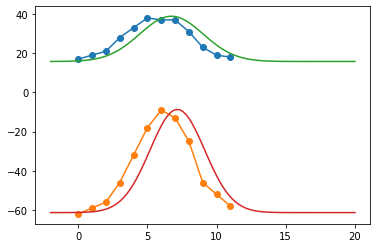

In [187]:
maxtemp = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
mintemp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
plt.plot(maxtemp, marker = 'o')
plt.plot(mintemp,marker ='o')
length_max = list(range(1, len(maxtemp)+1))
length_min = list(range(1,len(mintemp)+1))

def f(x,a,b,c,d):
   # return a * (np.sin((b*x) -c)) + d
    return a * np.exp(-np.power(x-b,2)/(np.power(c,2)))-d


popt, pcov = sp.optimize.curve_fit(f, length_max,maxtemp)
print(popt)
print("----")
popt1, pcov1 = sp.optimize.curve_fit(f, length_min,mintemp)
print(popt1)
print("----")


x = np.linspace(-2,20,100)
plt.plot(x, f(x,*popt))
plt.plot(x,f(x,*popt1))

ssr_max = np.sum(( f(length_max,popt[0],popt[1], popt[2],popt[3])- maxtemp)**2)
tss_max = np.sum((np.mean(maxtemp) - maxtemp)**2)

rsq_max = 1 - ssr_max / tss_max
print(rsq_max)
print("----")

ssr_min = np.sum(( f(length_min,popt1[0],popt1[1], popt1[2],popt1[3])- mintemp)**2)
tss_min = np.sum((np.mean(mintemp) - mintemp)**2)

rsq_min = 1 - ssr_min / tss_min
print(rsq_min)


phi1 = popt[2]
phi2 = popt1[2]
var1 = ssr_max/len(maxtemp)
var2 = ssr_min/len(maxtemp)
print("----")
print(abs(phi1-phi2))
print("----")
print(var1+var2)

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
p-value = 0.4954537257139111


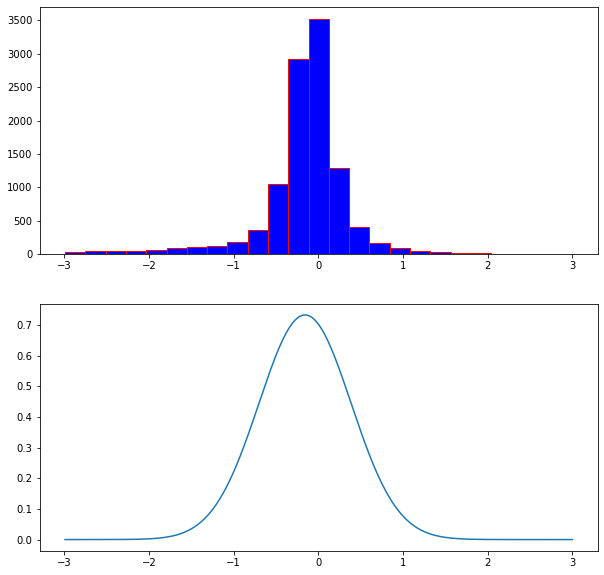

In [188]:
from scipy.stats import norm

df = pd.DataFrame(pd.read_pickle('data/residuals_261.pkl').item())

print(df)
df = df[df['residuals']>-3]
df = df[df['residuals']<3]

bins = 25
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,10))
hist = ax[0].hist((df['residuals']), bins=bins, color='blue', edgecolor='red')
bin_edges = hist[1]
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
h = hist[0]
def gauss(x, mean, std):
    return norm.pdf(x, mean, std)


mu, sigma = norm.fit(df['residuals'])

xfit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
plt.plot(xfit, f_gauss(xfit, mu, sigma))

ndof = len(df['residuals']) - 1
chi2 = np.sum(np.square(df['residuals'] - np.mean(df['residuals'])))/np.square(sigma)
pvalue = 1. - sp.stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

#the fit is satisfactory since the p_value>0.05


In [40]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-07 15:02:44--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-07 15:02:45--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc72b3be31a754e672e51e3f5f81.dl.dropboxusercontent.com/cd/0/inline/BdWa5rJQ5CgR87udC6M0YG0hsCpTJDs3xqUmmwibbking5lymczQsMUBgVPsEBvLMci1tpg3dt2F3bgx-6OX1Ue-oJ_axvhti9InamQyDUArrI9unQRVefTeugGB8b9OLOZi8336irDy7LjeWPiYP2Xg/file# [following]
--2022-01-07 15:02:46--  https://uc72b3be31a754e672e51e3f5f81.dl.dropboxusercontent.com/cd/0/inline/BdWa5rJQ5CgR87udC6M0YG0hsCpTJDs3xqUmmwibbking5lymczQsMUBgVPsEBvLMci1tpg3dt2F3bgx-6OX1Ue-oJ_axvhti9Ina

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

6679
___
6679
<class 'numpy.ndarray'>
Best parameters after the fit are [-9.67127681 12.34271735  9.05256209]
Average temperature in Munich is 8.941907038598593
Average temperature predicted by the model 8.94056140020425
Best parameters after the fit are [-9.67127681 12.34271735  9.05256209]
The RSS for f(x) is 1336026.1369107089
The RSS for g(x) is 1310815.8230334842
1.1102230246251565e-16


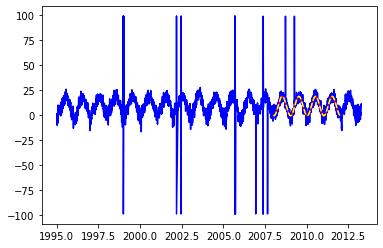

In [194]:
def f_temp(x, a, b, c):
    return a * np.cos(2 * np.pi * x + b) + c

def g_temp(x,a,b,c,d):
    return a * np.cos(2 * np.pi * x * b+c) + d
popt3, pcov3 = sp.optimize.curve_fit(g_temp, date, temperature)
plt.plot(x, g_temp(x, *popt3), color='yellow')

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - sp.stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)
print(len(date))
print('___')
print(len(temperature))
print(type(date))
#df = pd.DataFrame( data = date, columns = 'date')
#print(df)

plt.plot(date,temperature, color='blue')

popt2, pcov2 = sp.optimize.curve_fit(f_temp, date, temperature)
x = np.linspace(2008, 2012, 150)
plt.plot(x, f_temp(x, *popt2), color='red')
print('Best parameters after the fit are', popt2)
print('Average temperature in Munich is', np.mean(temperature))
print('Average temperature predicted by the model', np.mean(f_temp(temperature,*popt2)))
#print(df['date'(temperature(np.min(temperature))

popt3, pcov3 = sp.optimize.curve_fit(g_temp, date, temperature)
plt.plot(x, g_temp(x, *popt3), color='yellow', linestyle='dashed')
print('Best parameters after the fit are', popt2)

y1=f_temp(temperature,*popt2)
y2=g_temp(temperature,*popt3)
ssr1 = np.sum(( y1- temperature)**2)
ssr2 = np.sum(( y2- temperature)**2)
print('The RSS for f(x) is',ssr1)
print('The RSS for g(x) is',ssr2)



CL=Ftest(ssr1,ssr2,3,4,len(temperature))
print(CL)





#idk why it doesn't print everything. seemed to be working in the class notebook, however since CL<0.1 then the 4th parameter is not necessary 






In [190]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt


--2022-01-15 21:48:12--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-15 21:48:12--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc23f2a93a759707212a3f00d478.dl.dropboxusercontent.com/cd/0/inline/Bd3cvEHRm-Ada_Xsx8E6d8aO9uOKfIuzc9shs_CG8oAIQK5KNNIITXlbsBW808SPta66rGdat1kNLzqADz7QjQEqazTMXtLjfQUEDEENO-vCQC2ydkK9kXj52KYW467yPkrxayLymYWlgs_IeWuk9LsG/file# [following]
--2022-01-15 21:48:13--  https://uc23f2a93a759707212a3f00d478.dl.dropboxusercontent.com/cd/0/inline/Bd3cvEHRm-Ada_Xsx